# 77_PCA - iris 1
- iris 데이터 셋 불러오기
- iris 원 데이터 pairplot(seaborn)
- StandardScaler 적용 > fit_transform
- PCA 적용
- PCA 결과를 Pandas로 적용
- iris_pd_pca 의 pairplot(seaborn)

In [48]:
# iris 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns

iris = load_iris()
        # type : sklearn.utils.Bunch , not dict

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
                        # numpy.ndarray type
                                                # list type
iris_pd['species'] = iris.target
                        # numpy.ndarray type
iris_pd.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [49]:
iris.keys()
# iris datasets 은 다음과 같은 key 를 가지고 있다.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

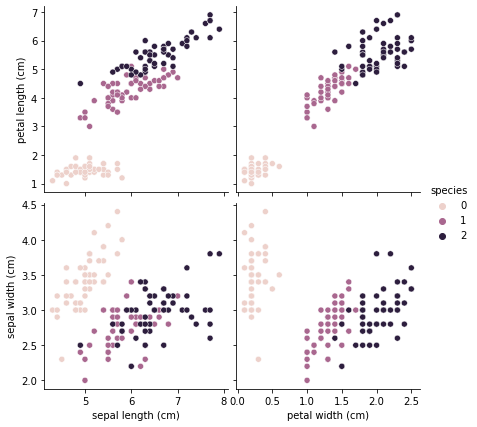

In [50]:
# pairplot
sns.pairplot(iris_pd, hue='species', height=3,
            x_vars = ['sepal length (cm)', 'petal width (cm)'],
            y_vars = ['petal length (cm)', 'sepal width (cm)']);

---------------

In [51]:
# 일단 Scaler 적용
from sklearn.preprocessing import StandardScaler
                                    # PCA에서는 SS 가 중요하다

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

In [52]:
# pca 적용
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
                            # 주성분 2개를 찾으라고 지시함. // iris의 feature는 4개인데, 
                            # 그 중에서 가장 잘나오는 2개를 찾으라
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)

    return pca.transform(ss_data), pca

In [53]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape
        # (원 데이터 크기, components 수)

(150, 2)

In [54]:
pca.mean_
    # 4개 특성에 대한 각각의 평균 값들.

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [55]:
pca.components_
    # 요소는 4개이지만
    # 실제 백터는 2개가 만들어진다.

    # 4개의 피쳐가 2개의 pc로 줄어들게 된다.

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [56]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [57]:
# pca 결과를 Pandas 로 정리
def get_pd_from_pca(pca_data, cols=['pca_component_1', 'pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [58]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

,pca_component_1,pca_component_2,species
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


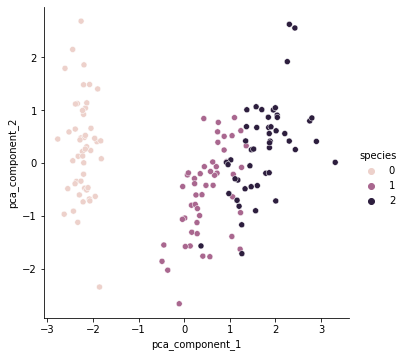

In [59]:
# 두개의 특성을 그리기
sns.pairplot(iris_pd_pca, hue='species', height=5,
            x_vars=['pca_component_1'], y_vars=['pca_component_2']);